In [1]:
import numpy as np
import matplotlib.pyplot as pl
import pandas as pd
import seaborn as sns

The textfiledata is the file with all the data in. 
The textfilenames is the file with all the names of the parameters.

In [2]:
Dstspot = 16
Dstspot = Dstspot - 1

Forecasting_hours = [1,5,10,15,30,40,50,60]

In [3]:
textfiledata = "20062018.txt"
#textfilenames = "names.txt"

In [4]:
datapanda = pd.read_csv(textfiledata,delim_whitespace=True,header=None)

In [5]:
dens = datapanda.loc[1:,3].values

for i in range(0, len(dens)):
    if dens[i] == 999.9:
        j = 1
        while dens[i+j] == 999.9:
            j = j+1
        diff = (dens[i+j] - dens[i-1])/ (j+1)
        for h in range(1, j+1):
            dens[i+h-1] = dens[i-1] + h *diff
            
datapanda.loc[1:,3] = dens

In [6]:
dens = datapanda.loc[1:,4].values

for i in range(0, len(dens)):
    if dens[i] == 999.9:
        j = 1
        while dens[i+j] == 999.9:
            j = j+1
        diff = (dens[i+j] - dens[i-1])/ (j+1)
        for h in range(1, j+1):
            dens[i+h-1] = dens[i-1] + h *diff
            
datapanda.loc[1:,4] = dens


In [7]:
dens = datapanda.loc[1:,5].values

for i in range(0, len(dens)):
    if dens[i] == 999.9:
        j = 1
        while dens[i+j] == 999.9:
            j = j+1
        diff = (dens[i+j] - dens[i-1])/ (j+1)
        for h in range(1, j+1):
            dens[i+h-1] = dens[i-1] + h *diff
            
datapanda.loc[1:,5] = dens


In [8]:
dens = datapanda.loc[1:,6].values

for i in range(0, len(dens)):
    if dens[i] == 9999999.:
        j = 1
        while dens[i+j] == 9999999.:
            j = j+1
        diff = (dens[i+j] - dens[i-1])/ (j+1)
        for h in range(1, j+1):
            dens[i+h-1] = dens[i-1] + h *diff
            
datapanda.loc[1:,6] = dens


In [9]:
dens = datapanda.loc[1:,7].values

for i in range(0, len(dens)):
    if dens[i] == 999.9:
        j = 1
        while dens[i+j] == 999.9:
            j = j+1
        diff = (dens[i+j] - dens[i-1])/ (j+1)
        for h in range(1, j+1):
            dens[i+h-1] = dens[i-1] + h *diff
            
datapanda.loc[1:,7] = dens


In [10]:
dens = datapanda.loc[1:,11].values

for i in range(0, len(dens)):
    if dens[i] == 9.999:
        j = 1
        while dens[i+j] == 9.999:
            j = j+1
        diff = (dens[i+j] - dens[i-1])/ (j+1)
        for h in range(1, j+1):
            dens[i+h-1] = dens[i-1] + h *diff
            
datapanda.loc[1:,11] = dens


In [11]:
dens = datapanda.loc[1:,12].values

for i in range(0, len(dens)):
    if dens[i] == 99.99:
        j = 1
        while dens[i+j] == 99.99:
            j = j+1
        diff = (dens[i+j] - dens[i-1])/ (j+1)
        for h in range(1, j+1):
            dens[i+h-1] = dens[i-1] + h *diff
            
datapanda.loc[1:,12] = dens

In [12]:
dens = datapanda.loc[1:,20].values

for i in range(0, len(dens)):
    if dens[i] == 99999.99:
        j = 1
        while dens[i+j] == 99999.99:
            j = j+1
        diff = (dens[i+j] - dens[i-1])/ (j+1)
        for h in range(1, j+1):
            dens[i+h-1] = dens[i-1] + h *diff
            
datapanda.loc[1:,20] = dens

In [13]:
dens = datapanda.loc[1:,21].values

for i in range(0, len(dens)):
    if dens[i] == 99999.99:
        j = 1
        while dens[i+j] == 99999.99:
            j = j+1
        diff = (dens[i+j] - dens[i-1])/ (j+1)
        for h in range(1, j+1):
            dens[i+h-1] = dens[i-1] + h *diff
            
datapanda.loc[1:,21] = dens

In [14]:
# Quantify number of parameters automatically
# taking out the columns for the timestamps and Dst output
NrParam = datapanda.values[0].shape[0] - 4 

In [15]:
namelist = ['|B|', 'Bz (GSE)', 'Bz (GSM)', 'Pl. Temp', 'Pl. Dens', 'Pl. Speed', 'Pl. long ang', 'Pl. lat ang', 'Pl. alpha/prot',
            'Pl. Pressure', 'Pl. E','Kp', 'Dst','ap', 'AE', 'AL','AU', 
            'prot. flux 30', 'prot. flux 60']

In [16]:
pearsondf = pd.DataFrame()
kendalldf = pd.DataFrame()
spearmandf = pd.DataFrame()

In [17]:
for i in range(0, len(Forecasting_hours)):
    hour = Forecasting_hours[i]
    # Obtain the timestamps from the text file
    Timestamps = datapanda.loc[:,0:2].values
    # Obtain the measurement parameters from the text file that need to be checked for correlations
    end = Timestamps.shape[0]- hour - 1
    Parameters = pd.DataFrame(datapanda.loc[0:end,3:(3+NrParam)].values, columns=namelist)
    # Obtain the Dst index from the text file
    Dst = pd.DataFrame(datapanda.loc[hour:,Dstspot].values, columns=['Dst Shifted'])
    All = pd.concat([Parameters, Dst], axis=1)
    # parametric test (sensitive to data distribution)
    corr_Pearson = All.corr(method='pearson')
    pearsoncorrelation = corr_Pearson.iloc[:,-1]
    pearsondf = pd.concat([pearsondf, pearsoncorrelation], axis=1, sort=False)
    # non-parametric test (not dependent on distribution of data)
    corr_Kendall = All.corr(method='kendall')
    kendallcorrelation = corr_Kendall.iloc[:,-1]
    kendalldf = pd.concat([kendalldf, kendallcorrelation], axis=1, sort=False)
    corr_Spearman = All.corr(method='spearman')
    spearmancorrelation = corr_Spearman.iloc[:,-1]
    spearmandf = pd.concat([spearmandf, spearmancorrelation], axis=1, sort=False)



In [18]:
print(pearsondf)

                Dst Shifted  Dst Shifted  Dst Shifted  Dst Shifted  \
|B|               -0.294313    -0.382486    -0.425171    -0.426199   
Bz (GSE)           0.334695     0.291875     0.207949     0.142327   
Bz (GSM)           0.405209     0.361183     0.272217     0.203261   
Pl. Temp          -0.376056    -0.401632    -0.398137    -0.367622   
Pl. Dens           0.270502     0.130585     0.029496    -0.029380   
Pl. Speed         -0.326109    -0.321603    -0.303090    -0.276704   
Pl. long ang      -0.041266    -0.034873    -0.026978    -0.017254   
Pl. lat ang       -0.010558    -0.008393    -0.009267    -0.006890   
Pl. alpha/prot    -0.312664    -0.313125    -0.295957    -0.272789   
Pl. Pressure      -0.066062    -0.223702    -0.307360    -0.331166   
Pl. E             -0.043096    -0.038862    -0.032372    -0.025800   
Kp                -0.583897    -0.623990    -0.596509    -0.555183   
Dst                0.972815     0.815497     0.675950     0.579613   
ap                -0

<Figure size 432x288 with 0 Axes>

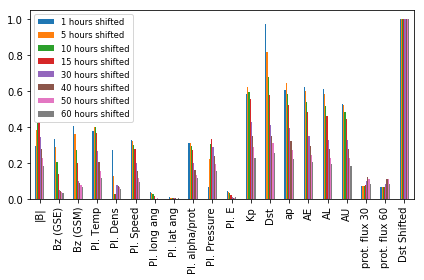

<Figure size 432x288 with 0 Axes>

In [20]:
abs(pearsondf).plot(kind='bar')
pl.tight_layout()
pl.legend(['1 hours shifted', '5 hours shifted', '10 hours shifted', '15 hours shifted', '30 hours shifted',
           '40 hours shifted', '50 hours shifted','60 hours shifted'], fontsize = 'small')

pl.savefig('3pearsonbar', format='pdf')
pl.figure()

<Figure size 432x288 with 0 Axes>

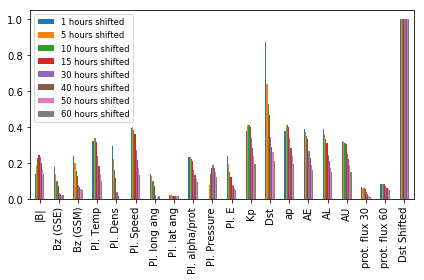

<Figure size 432x288 with 0 Axes>

In [21]:
abs(kendalldf).plot(kind='bar')
pl.tight_layout()
pl.legend(['1 hours shifted', '5 hours shifted', '10 hours shifted', '15 hours shifted', '30 hours shifted',
           '40 hours shifted', '50 hours shifted','60 hours shifted'], fontsize = 'small')

pl.savefig('3kendallbar', format='pdf')
pl.figure()

<Figure size 432x288 with 0 Axes>

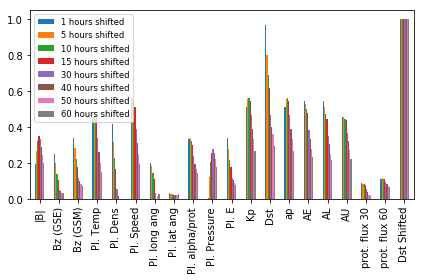

<Figure size 432x288 with 0 Axes>

In [22]:
abs(spearmandf).plot(kind='bar')
pl.tight_layout()
pl.legend(['1 hours shifted', '5 hours shifted', '10 hours shifted', '15 hours shifted', '30 hours shifted',
           '40 hours shifted', '50 hours shifted','60 hours shifted'], fontsize = 'small')

pl.savefig('3spearmanbar', format='pdf')
pl.figure()

# correlation maps 5 hours in advance

In [23]:
hour = 5
# Obtain the timestamps from the text file
Timestamps = datapanda.loc[:,0:2].values
# Obtain the measurement parameters from the text file that need to be checked for correlations
end = Timestamps.shape[0]- hour - 1
Parameters = pd.DataFrame(datapanda.loc[0:end,3:(3+NrParam)].values, columns=namelist)
# Obtain the Dst index from the text file
Dst = pd.DataFrame(datapanda.loc[hour:,Dstspot].values, columns=['Dst Shifted'])
All = pd.concat([Parameters, Dst], axis=1)
# parametric test (sensitive to data distribution)
corr_Pearson = All.corr(method='pearson')
pearsoncorrelation = corr_Pearson.iloc[:,-1]
pearsondf = pd.concat([pearsondf, pearsoncorrelation], axis=1, sort=False)
# non-parametric test (not dependent on distribution of data)
corr_Kendall = All.corr(method='kendall')
kendallcorrelation = corr_Kendall.iloc[:,-1]
kendalldf = pd.concat([kendalldf, kendallcorrelation], axis=1, sort=False)
corr_Spearman = All.corr(method='spearman')
spearmancorrelation = corr_Spearman.iloc[:,-1]
spearmandf = pd.concat([spearmandf, spearmancorrelation], axis=1, sort=False)

<Figure size 432x288 with 0 Axes>

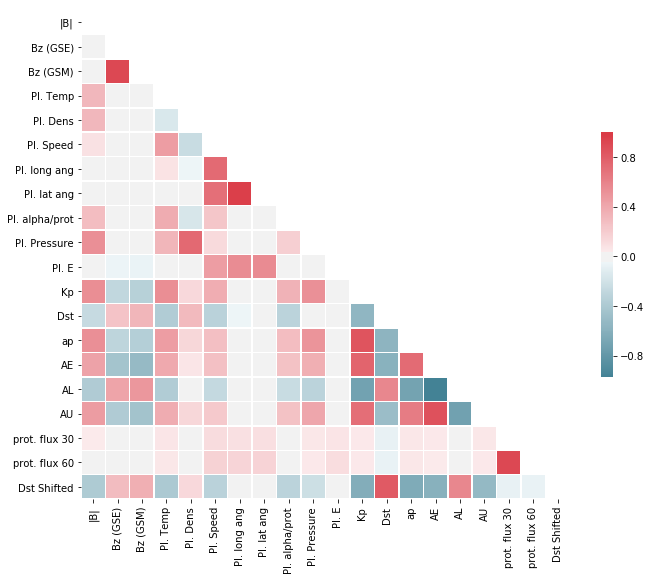

<Figure size 432x288 with 0 Axes>

In [24]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_Pearson, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = pl.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio --> Correlation Pearson (linear)
sns.heatmap(corr_Pearson, mask=mask, cmap=cmap, vmax=1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


pl.savefig('3pearsonheat', format='pdf')
pl.figure()

<Figure size 432x288 with 0 Axes>

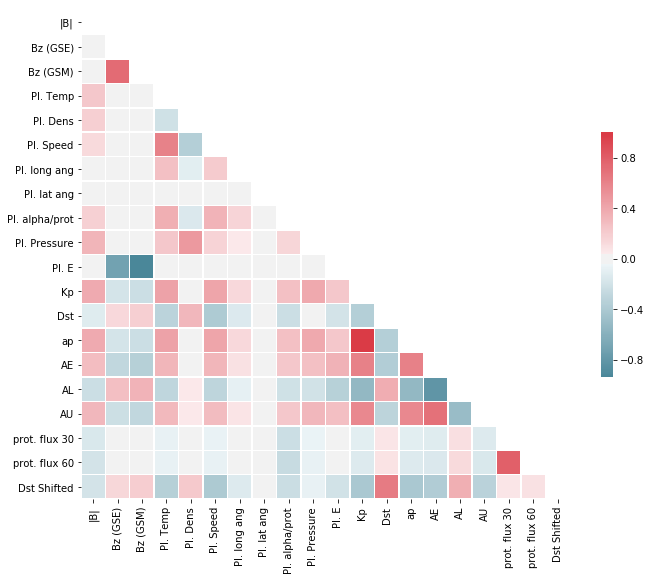

<Figure size 432x288 with 0 Axes>

In [25]:

# Generate a mask for the upper triangle
mask = np.zeros_like(corr_Pearson, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = pl.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio --> Correlation Kendall-Tau

sns.heatmap(corr_Kendall, mask=mask, cmap=cmap, vmax=1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

pl.savefig('3kendallheat', format='pdf')
pl.figure()

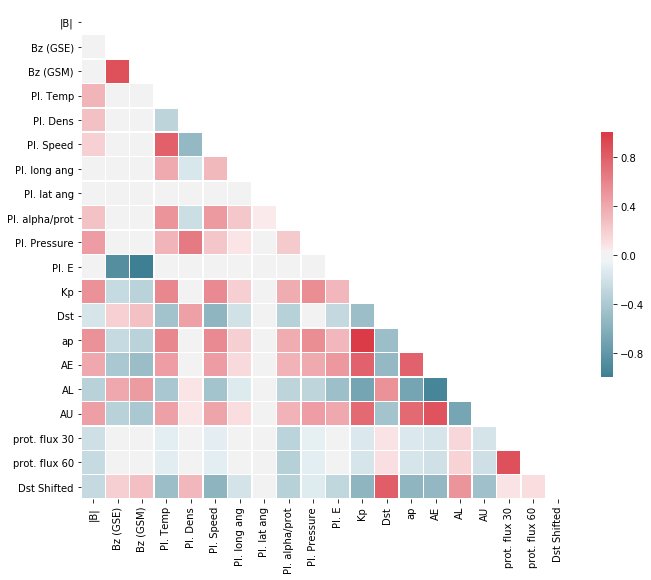

In [26]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_Pearson, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = pl.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)


# Draw the heatmap with the mask and correct aspect ratio --> Correlation Spearman (monotonic)

sns.heatmap(corr_Spearman, mask=mask, cmap=cmap, vmax=1., center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
pl.savefig('3spearmanheat', format='pdf')